In [1]:
# Import
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import time
import glob
import os

In [2]:
LABEL_DICT =  {
    "Red" : 1,
    "Yellow" : 2,
    "Green" : 3
#    "Off" : 4
    }
"""
LABEL_DICT =  {
    "Green" : 1,
    "Red" : 2,
    "GreenLeft" : 3,
    "GreenRight" : 4,
    "RedLeft" : 5,
    "RedRight" : 6,
    "Yellow" : 7,
    "off" : 8,
    "RedStraight" : 9,
    "GreenStraight" : 10,
    "GreenStraightLeft" : 11,
    "GreenStraightRight" : 12,
    "RedStraightLeft" : 13,
    "RedStraightRight" : 14
    }
"""
def get_color_string(value):
    for color_str, color_id in LABEL_DICT.items():
        if value == color_id:
            return color_str
    return "Undefined"

In [3]:
graph_filename = "output_inference/frozen_inference_graph.pb"
image_directory = "evaluation_data/simulator_images"

In [4]:
# Helper functions
def load_graph(frozen_graph_filename):
    with tf.gfile.GFile(frozen_graph_filename, "rb") as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read()) 
    with tf.Graph().as_default() as graph:
        tf.import_graph_def(graph_def, name="")
    return graph

def load_image(image_filename):
    img = cv2.imread(image_filename)
    return  cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

def draw_rect(image, bbox, thickness = 4):
    rows = image.shape[0]
    cols = image.shape[1]
    x = bbox[1] * cols
    y = bbox[0] * rows
    right = bbox[3] * cols
    bottom = bbox[2] * rows
    return cv2.rectangle(image, (int(x), int(y)), (int(right), int(bottom)), (255, 0, 0), thickness=thickness)

In [5]:
# Load frozen graph
graph = load_graph(graph_filename)    

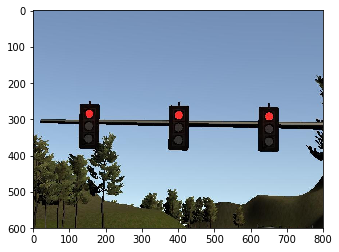

In [6]:
# Get list of images from directory
image_list = glob.glob(os.path.join(image_directory,'*.jpg'))
image = load_image(image_list[0]) 
plt.imshow(image)
plt.show()

In [7]:
# Run inference
start = time.clock()
with tf.Session(graph=graph) as sess:
    detections, scores, boxes, classes = [], [], [], []
    for i in range(len(image_list)):
        image = load_image(image_list[i])
        tf_image_input = np.expand_dims(image, axis=0)
        d, s, b, c = sess.run([
            sess.graph.get_tensor_by_name('num_detections:0'),
            sess.graph.get_tensor_by_name('detection_scores:0'),
            sess.graph.get_tensor_by_name('detection_boxes:0'),
            sess.graph.get_tensor_by_name('detection_classes:0')], 
            feed_dict={'image_tensor:0': tf_image_input})
        detections.append(d)
        scores.append(s)
        boxes.append(b)
        classes.append(c)
end = time.clock()
print("Time for inference is {:.2f}s".format(end-start))

Time for inference is 50.70s


Light color is Red 1 with score 0.82
Light color is Red 1 with score 0.80
Light color is Red 1 with score 0.73
First classId Red with score 0.8185794949531555


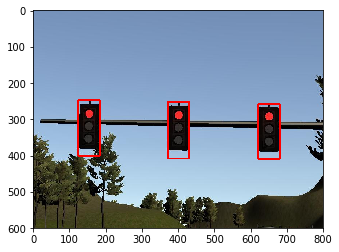

Light color is Red 1 with score 0.82
Light color is Red 1 with score 0.80
Light color is Red 1 with score 0.73
First classId Red with score 0.8185794949531555


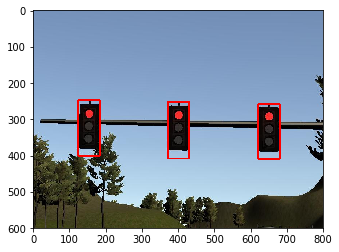

Light color is Red 1 with score 0.82
Light color is Red 1 with score 0.80
Light color is Red 1 with score 0.69
First classId Red with score 0.8167069554328918


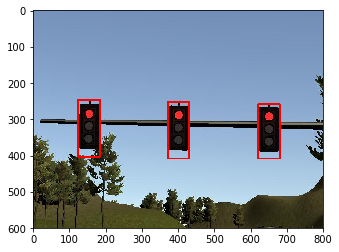

Light color is Red 1 with score 0.82
Light color is Red 1 with score 0.80
Light color is Red 1 with score 0.69
First classId Red with score 0.8167069554328918


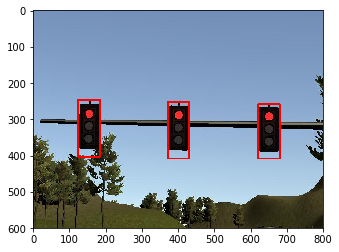

Light color is Red 1 with score 0.83
Light color is Red 1 with score 0.83
Light color is Red 1 with score 0.68
First classId Red with score 0.8311923742294312


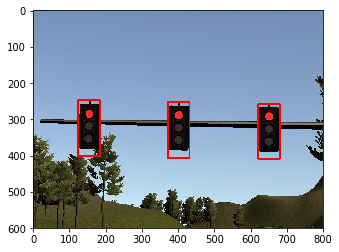

Light color is Red 1 with score 0.83
Light color is Red 1 with score 0.83
Light color is Red 1 with score 0.68
First classId Red with score 0.8311923742294312


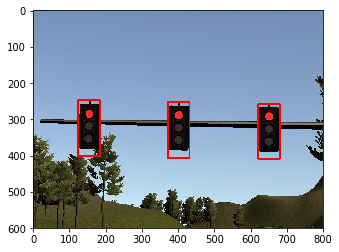

Light color is Red 1 with score 0.86
Light color is Red 1 with score 0.83
Light color is Red 1 with score 0.69
First classId Red with score 0.8566120862960815


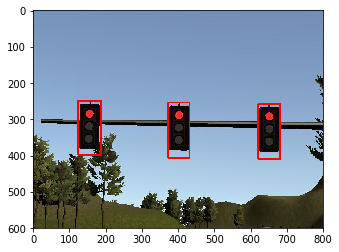

Light color is Red 1 with score 0.86
Light color is Red 1 with score 0.83
Light color is Red 1 with score 0.69
First classId Red with score 0.8566120862960815


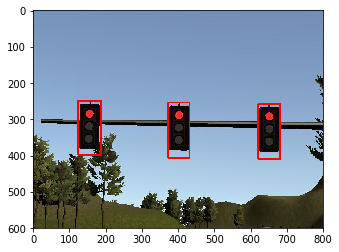

Light color is Red 1 with score 0.88
Light color is Red 1 with score 0.85
Light color is Red 1 with score 0.75
First classId Red with score 0.8774313926696777


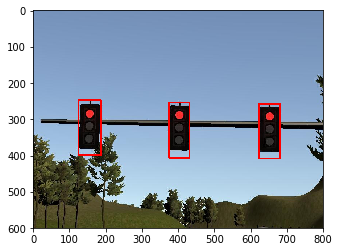

Light color is Red 1 with score 0.88
Light color is Red 1 with score 0.85
Light color is Red 1 with score 0.75
First classId Red with score 0.8774313926696777


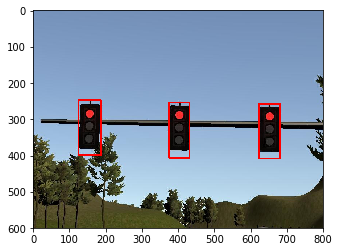

Light color is Red 1 with score 0.83
Light color is Red 1 with score 0.80
Light color is Red 1 with score 0.52
First classId Red with score 0.8334087133407593


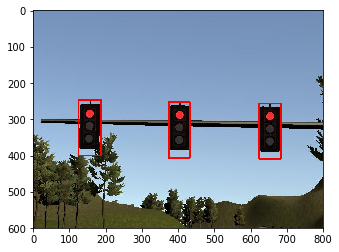

Light color is Red 1 with score 0.83
Light color is Red 1 with score 0.80
Light color is Red 1 with score 0.52
First classId Red with score 0.8334087133407593


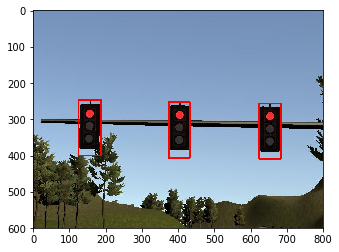

Light color is Red 1 with score 0.82
Light color is Red 1 with score 0.81
Light color is Red 1 with score 0.74
First classId Red with score 0.8186501264572144


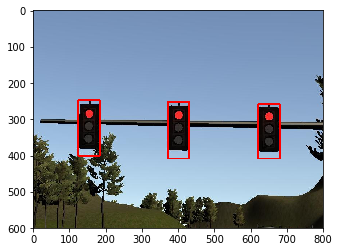

Light color is Red 1 with score 0.99
Light color is Red 1 with score 0.93
Light color is Red 1 with score 0.60
First classId Red with score 0.9920327663421631


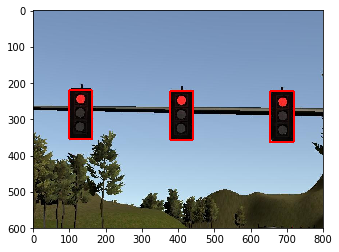

Light color is Red 1 with score 0.99
Light color is Red 1 with score 0.93
Light color is Red 1 with score 0.60
First classId Red with score 0.9920327663421631


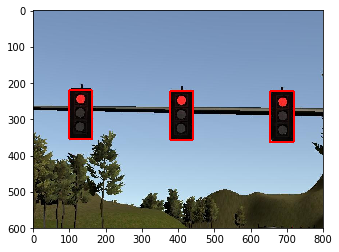

Light color is Red 1 with score 0.96
Light color is Red 1 with score 0.96
Light color is Red 1 with score 0.92
First classId Red with score 0.9582813382148743


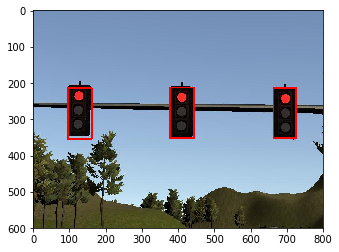

Light color is Red 1 with score 0.96
Light color is Red 1 with score 0.96
Light color is Red 1 with score 0.92
First classId Red with score 0.9582813382148743


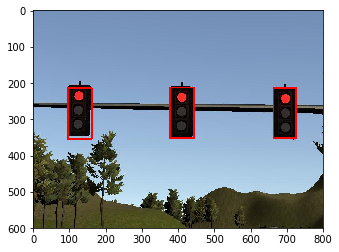

Light color is Green 3 with score 0.92
Light color is Green 3 with score 0.87
Light color is Green 3 with score 0.83
First classId Green with score 0.9244236946105957


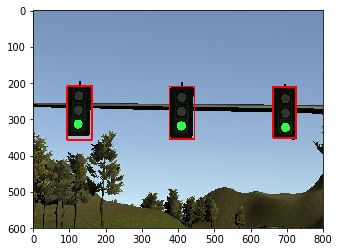

Light color is Green 3 with score 0.92
Light color is Green 3 with score 0.87
Light color is Green 3 with score 0.83
First classId Green with score 0.9244236946105957


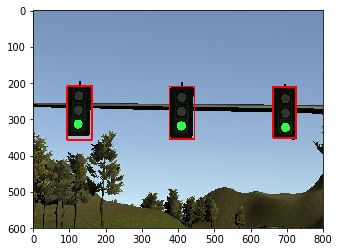

Light color is Green 3 with score 0.92
Light color is Green 3 with score 0.87
Light color is Green 3 with score 0.83
First classId Green with score 0.9244236946105957


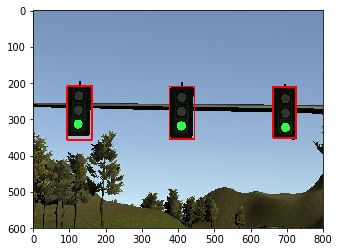

Light color is Green 3 with score 0.92
Light color is Green 3 with score 0.87
Light color is Green 3 with score 0.83
First classId Green with score 0.9244335889816284


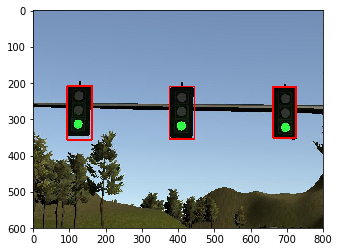

Light color is Green 3 with score 0.92
Light color is Green 3 with score 0.87
Light color is Green 3 with score 0.83
First classId Green with score 0.9244335889816284


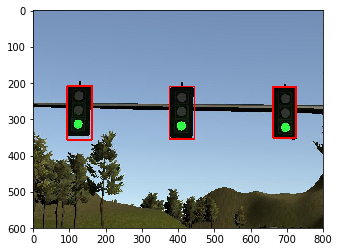

Light color is Green 3 with score 0.92
Light color is Green 3 with score 0.87
Light color is Green 3 with score 0.84
First classId Green with score 0.9236329197883606


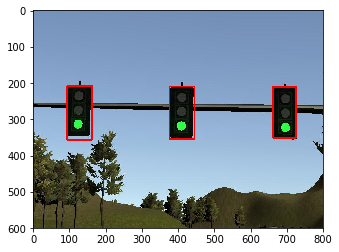

Light color is Red 1 with score 0.82
Light color is Red 1 with score 0.81
Light color is Red 1 with score 0.74
First classId Red with score 0.8186501264572144


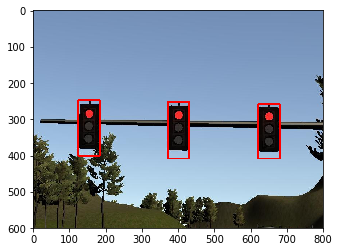

Light color is Yellow 2 with score 0.56
First classId Yellow with score 0.5577100515365601


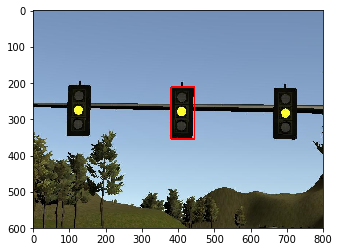

Light color is Red 1 with score 0.95
Light color is Red 1 with score 0.95
Light color is Red 1 with score 0.91
First classId Red with score 0.9549687504768372


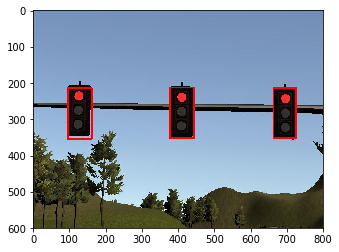

Light color is Red 1 with score 1.00
First classId Red with score 0.9976824522018433


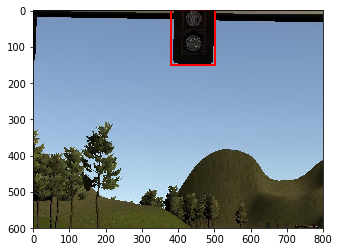

First classId Yellow with score 0.004125363193452358
No light detected


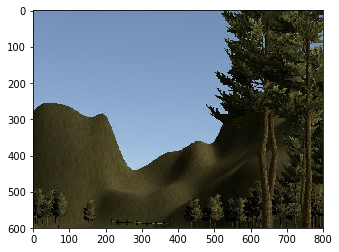

First classId Yellow with score 0.005295244976878166
No light detected


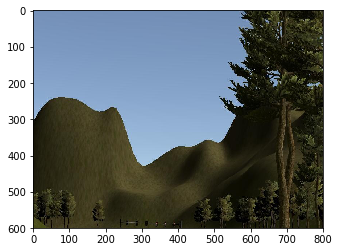

First classId Yellow with score 0.0033033343497663736
No light detected


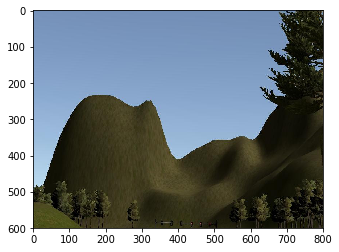

First classId Red with score 0.004085096530616283
No light detected


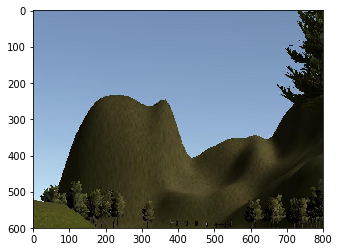

First classId Yellow with score 0.003959004767239094
No light detected


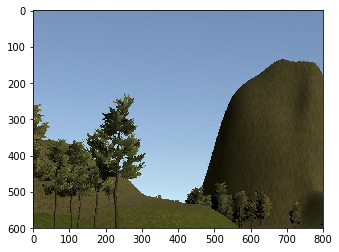

First classId Yellow with score 0.003959004767239094
No light detected


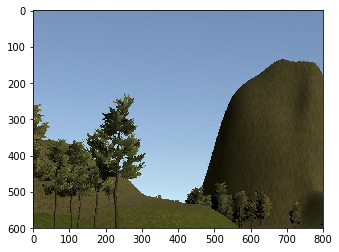

First classId Yellow with score 0.00479125278070569
No light detected


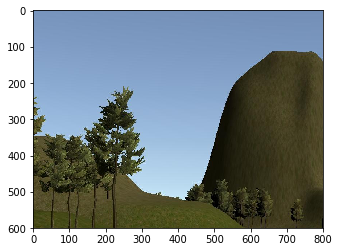

Light color is Red 1 with score 0.82
Light color is Red 1 with score 0.81
Light color is Red 1 with score 0.74
First classId Red with score 0.8186501264572144


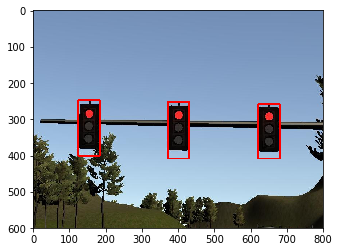

First classId Yellow with score 0.00479125278070569
No light detected


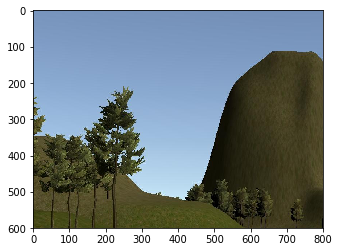

First classId Yellow with score 0.002895807381719351
No light detected


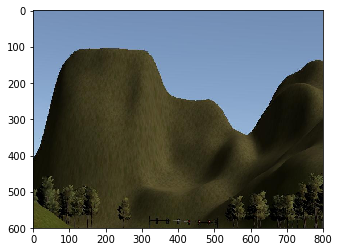

First classId Yellow with score 0.002895807381719351
No light detected


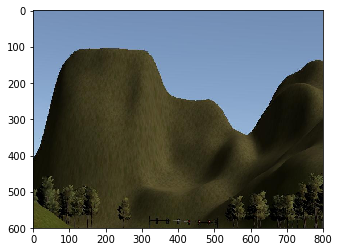

First classId Green with score 0.0032529740128666162
No light detected


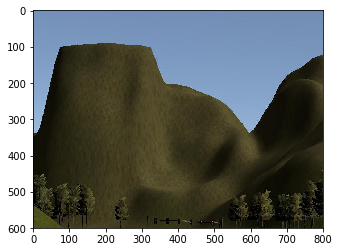

First classId Green with score 0.0032529740128666162
No light detected


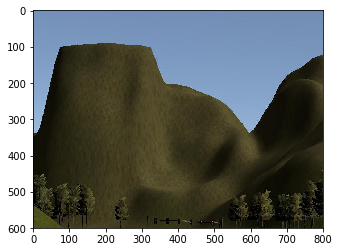

First classId Red with score 0.003695299383252859
No light detected


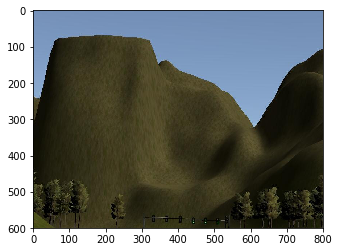

First classId Red with score 0.003695299383252859
No light detected


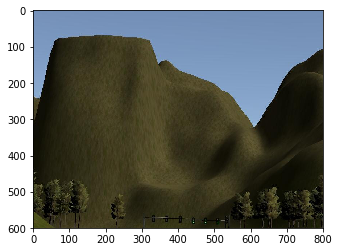

First classId Red with score 0.003439324675127864
No light detected


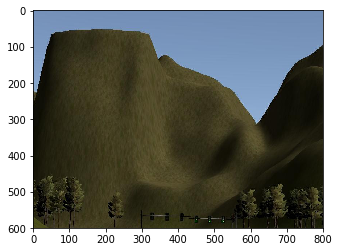

First classId Red with score 0.003439324675127864
No light detected


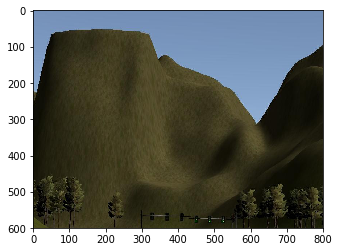

First classId Green with score 0.07112245261669159
No light detected


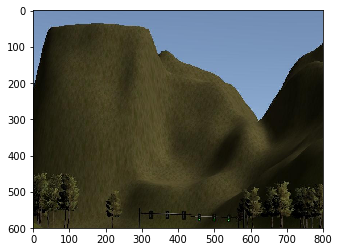

Light color is Red 1 with score 0.82
Light color is Red 1 with score 0.81
Light color is Red 1 with score 0.74
First classId Red with score 0.8186501264572144


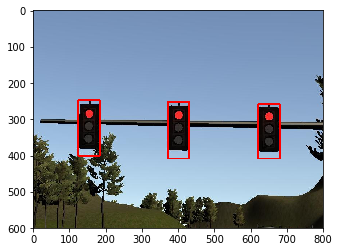

First classId Green with score 0.07112245261669159
No light detected


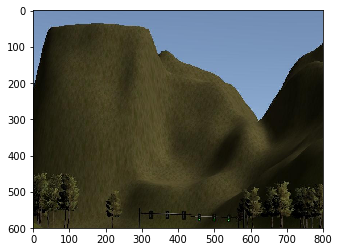

Light color is Green 3 with score 0.56
First classId Green with score 0.5563837289810181


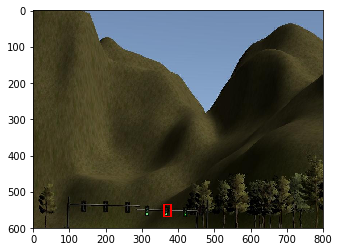

Light color is Green 3 with score 0.56
First classId Green with score 0.5563837289810181


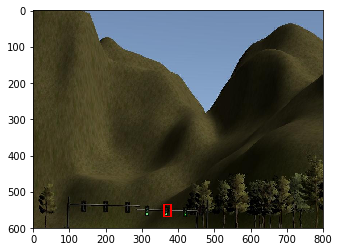

Light color is Green 3 with score 0.78
First classId Green with score 0.7768570184707642


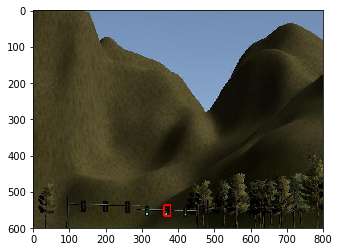

Light color is Green 3 with score 0.78
First classId Green with score 0.7768570184707642


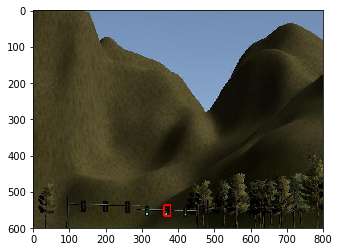

Light color is Green 3 with score 0.77
Light color is Green 3 with score 0.59
First classId Green with score 0.7692955732345581


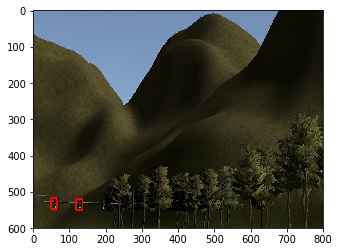

Light color is Green 3 with score 0.77
Light color is Green 3 with score 0.59
First classId Green with score 0.7692955732345581


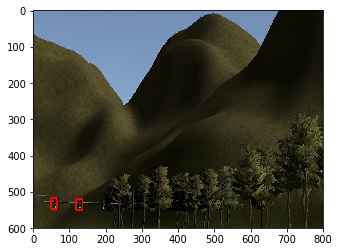

First classId Red with score 0.003948128316551447
No light detected


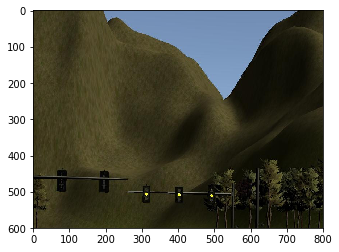

First classId Red with score 0.003948128316551447
No light detected


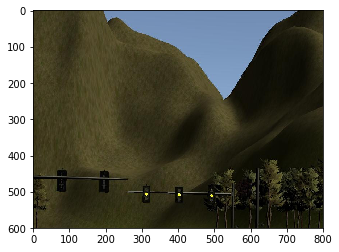

First classId Red with score 0.002603238681331277
No light detected


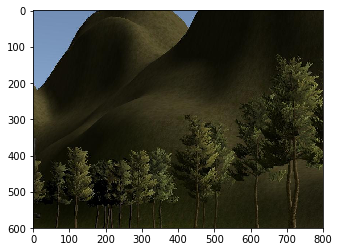

Light color is Red 1 with score 0.82
Light color is Red 1 with score 0.80
Light color is Red 1 with score 0.71
First classId Red with score 0.8168590068817139


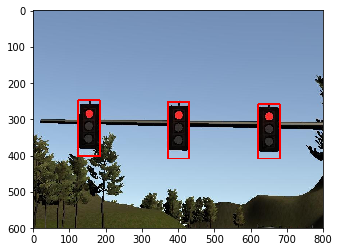

First classId Red with score 0.002603238681331277
No light detected


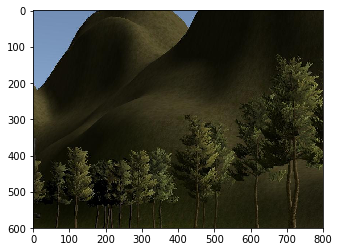

Light color is Red 1 with score 0.98
Light color is Red 1 with score 0.97
Light color is Red 1 with score 0.52
First classId Red with score 0.980600893497467


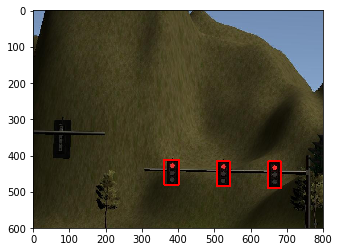

Light color is Red 1 with score 0.98
Light color is Red 1 with score 0.97
Light color is Red 1 with score 0.52
First classId Red with score 0.980600893497467


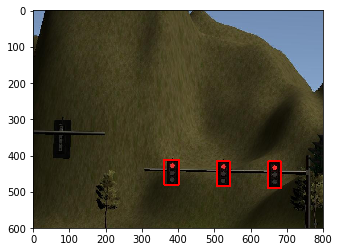

Light color is Red 1 with score 0.99
Light color is Red 1 with score 0.99
Light color is Red 1 with score 0.98
First classId Red with score 0.990822434425354


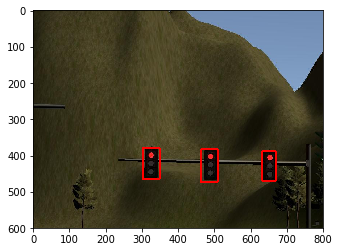

Light color is Red 1 with score 0.99
Light color is Red 1 with score 0.99
Light color is Red 1 with score 0.98
First classId Red with score 0.990822434425354


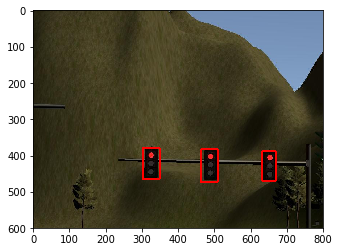

Light color is Red 1 with score 0.99
Light color is Red 1 with score 0.99
Light color is Red 1 with score 0.98
First classId Red with score 0.990822434425354


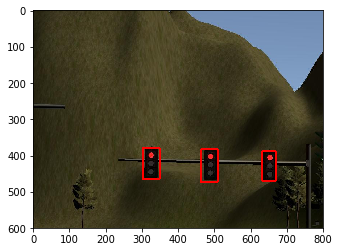

Light color is Red 1 with score 0.99
Light color is Red 1 with score 0.99
Light color is Red 1 with score 0.98
First classId Red with score 0.990822434425354


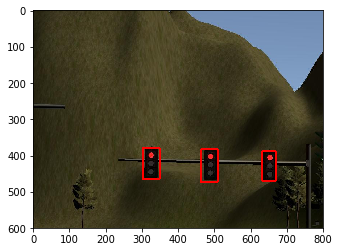

Light color is Red 1 with score 0.99
Light color is Red 1 with score 0.94
Light color is Red 1 with score 0.91
First classId Red with score 0.9904882907867432


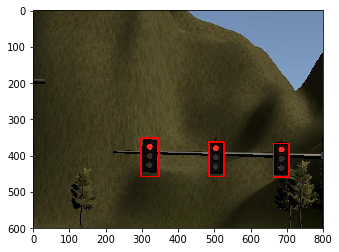

Light color is Red 1 with score 0.99
Light color is Red 1 with score 0.94
Light color is Red 1 with score 0.91
First classId Red with score 0.9904882907867432


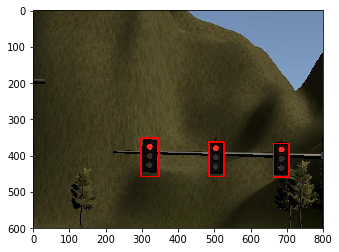

Light color is Red 1 with score 0.97
Light color is Red 1 with score 0.63
First classId Red with score 0.9728551506996155


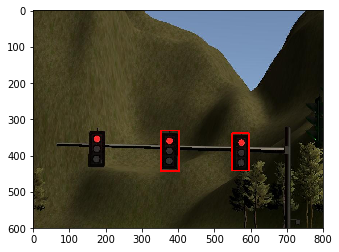

Light color is Red 1 with score 0.82
Light color is Red 1 with score 0.80
Light color is Red 1 with score 0.71
First classId Red with score 0.8168590068817139


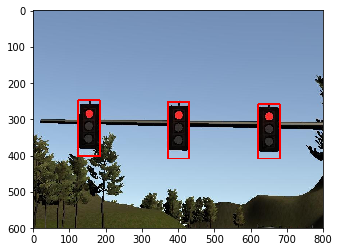

Light color is Red 1 with score 0.97
Light color is Red 1 with score 0.63
First classId Red with score 0.9728551506996155


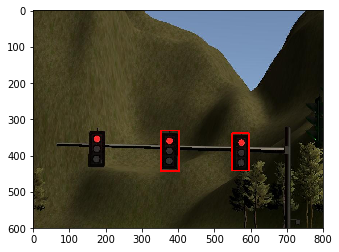

Light color is Red 1 with score 0.97
Light color is Red 1 with score 0.88
First classId Red with score 0.9742082357406616


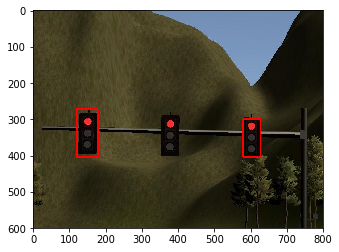

Light color is Red 1 with score 0.97
Light color is Red 1 with score 0.88
First classId Red with score 0.9742082357406616


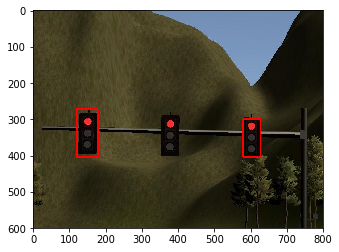

Light color is Red 1 with score 0.96
Light color is Red 1 with score 0.71
First classId Red with score 0.9558891654014587


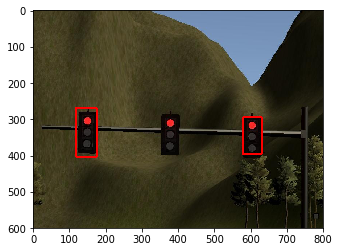

Light color is Red 1 with score 0.96
Light color is Red 1 with score 0.71
First classId Red with score 0.9558891654014587


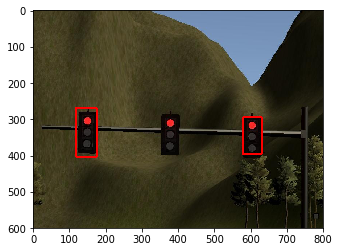

Light color is Green 3 with score 0.93
First classId Green with score 0.9269599318504333


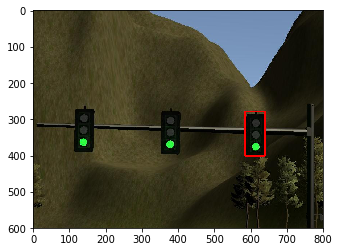

Light color is Green 3 with score 0.93
First classId Green with score 0.9269599318504333


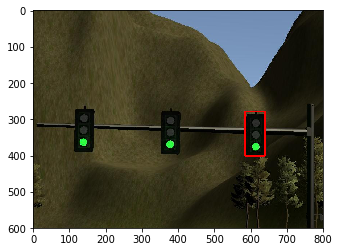

First classId Green with score 0.3531138598918915
No light detected


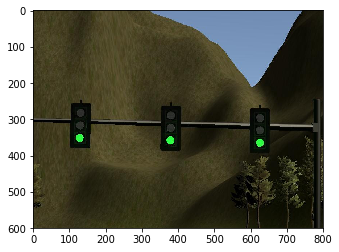

First classId Green with score 0.3531138598918915
No light detected


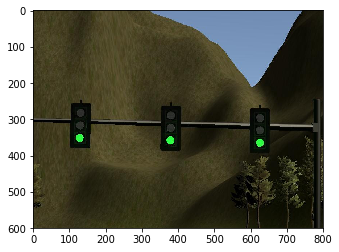

First classId Green with score 0.3462698757648468
No light detected


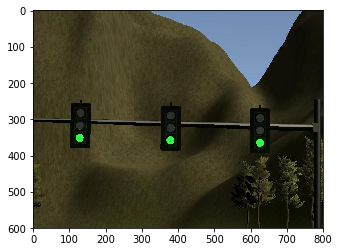

Light color is Red 1 with score 0.82
Light color is Red 1 with score 0.80
Light color is Red 1 with score 0.71
First classId Red with score 0.8168590068817139


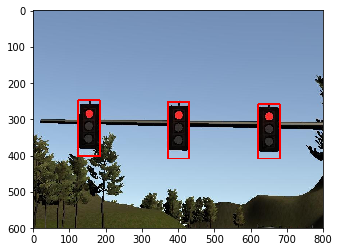

First classId Green with score 0.3462698757648468
No light detected


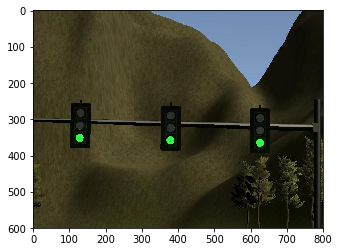

First classId Green with score 0.34491240978240967
No light detected


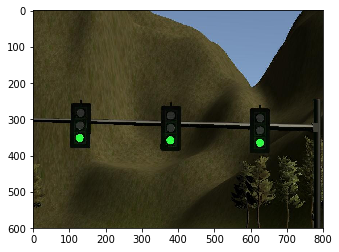

First classId Green with score 0.34491240978240967
No light detected


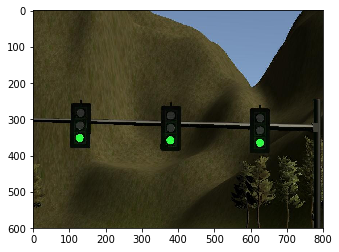

First classId Yellow with score 0.3912285268306732
No light detected


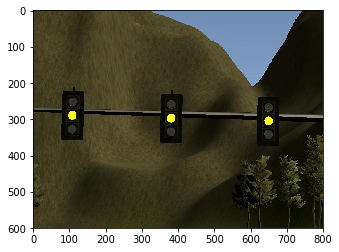

First classId Yellow with score 0.3912285268306732
No light detected


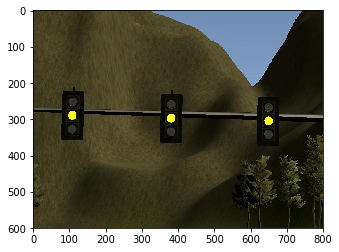

Light color is Red 1 with score 0.99
Light color is Red 1 with score 0.78
Light color is Red 1 with score 0.75
First classId Red with score 0.9882031083106995


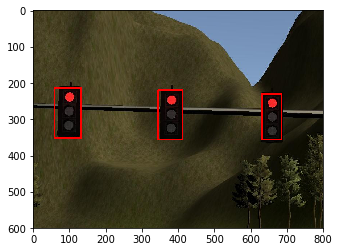

Light color is Red 1 with score 0.99
Light color is Red 1 with score 0.78
Light color is Red 1 with score 0.75
First classId Red with score 0.9882031083106995


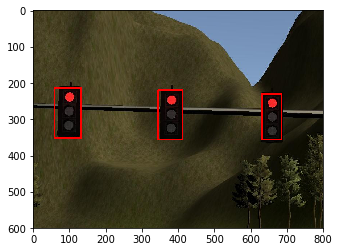

Light color is Red 1 with score 1.00
Light color is Red 1 with score 0.95
First classId Red with score 0.9977557063102722


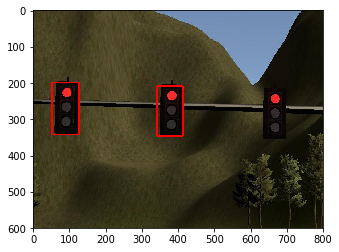

Light color is Red 1 with score 1.00
Light color is Red 1 with score 0.95
First classId Red with score 0.9977557063102722


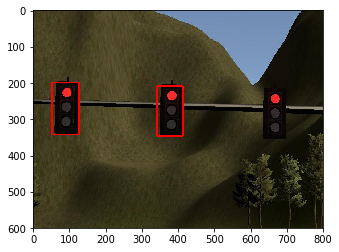

Light color is Red 1 with score 0.82
Light color is Red 1 with score 0.80
Light color is Red 1 with score 0.71
First classId Red with score 0.8168590068817139


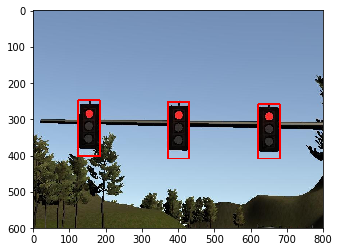

In [8]:
# Display results
for i in range(len(image_list)):
    image = load_image(image_list[i])
    num_detections = int(np.squeeze(detections[i]))
    plot = False
    classe = classes[i]
    scoree = scores[i]
    boxee = boxes[i]
    for j in range(num_detections):
        classId = int(np.squeeze(classe)[j])
        score = np.squeeze(scoree)[j]
        if score > 0.5:
            plot = True
            color = get_color_string(classId)
            print("Light color is {} {} with score {:.2f}".format(color, classId, score))
            bbox = [float(v) for v in np.squeeze(boxee)[j]]
            image_out = draw_rect(image, bbox)
    print("First classId {} with score {}".format(get_color_string(int(np.squeeze(classe)[0])),np.squeeze(scoree)[0]))
    if plot:
        
        plt.imshow(image_out)
        plt.show()
    else:
        print("No light detected")
        plt.imshow(image)
    plt.show()